<h1><center>MCMC tutorial</center></h1>

MCMC is listed as one of the top 10 algorithms of the 20th century. In this tutorial, we go through what is MCMC, when it is required and how to implement MCMC in python. We will also discuss a python library pymc3 for MCMC simulation. In this tutorial we will just give a hint on some of the important topics which we will require here but we will ourselves dont cover here.

In [62]:
import random
import math
import matplotlib. pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

<h2>Bayes Theorem</h2>

Bayes theorem forms the basis for bayesian statistics. Before reading further, please see <a href="https://www.youtube.com/watch?v=HZGCoVF3YvM">this</a> video. It visually explains what bayes theorem is and how the formula for the bayes theorem is derived. Bayes theorem is based on belief (prior distribution) which we update (to posterior distribution) based on the observations (data/evidence). MCMC is based on using bayes theorem.

<img src='Bayes.png' width=600></image>


<center>Figure 1. Bayes Theorem</center>

<h2>Markov Chains</h2>

Markov chain is a system that experience transition from one state to another. This transition is only based on the past state. For example, the probability that it will rain tomorrow depends only on the weather conditions today (if our system transitions from one state to another where time resolution is a day). This property is called <i>memoryless property</i>. This transition from one state to another happens probabilistically (based on a state transition matrix). Sine we collect a sequence of events (where the state changes probabilistically and not deterministically), we call Markov chain as a stochastic process.

In Markov chains, we need to know:
1. initial probability (what is the probability that the system starts from one of the given states)
2. state transition function (transition probability function from one state to another, could be a probability matrix)

Ergodicity is an important property of Markov chain which we will use in this tutorial. It has two properties:
1. Aperiodic: the Markov chain is not periodic. It does not return to one of its states periodically in fixed number of steps
2. Recurrent/irreducible: we should be able to reach from one state to another in finite number of steps with non-zero probability. It simply means, we are not getting stuck in one of the states (absorbing state) or missing out one of the states

<h2>Random numbers</h2>

Random number is a function that draws samples from a distribution. For example, if we know the mean and variance of data of interest (example height of adults in USA), we can draw a sample from that distribution. This sample is called random number and process is called random number generation. 

We use random number generation in simulation. For example, if we understand the past behavior of a user when we give them coupons, we can simulate how will they behave in future. There are a lot of system which we simulate because sometimes it is very hard to solve a problem analytically. Most of large systems are simulated for many years. For example, if a factory decides to buy a new machine, they will simulate as how much cost it will reduce for the company if they buy it. Since they have not bought it, they need to simulate the system. And for simulation and its analysis, we need data. This data is generated (or sampled from distribution) using random number generation. 

<b>This has to be random</b>. Why? Because no system in the world is deterministic. There is always randomness and uncertainty. By random number, we can not only check how our proposed solution (of buying or not buying that machine) will perform, we can also check what can be the worst case scenario (may be it will slow the speed of manufacturing as employees cannot move fast in the shop floor).

<h2>Monte Carlo Simulation</h2>

Monte Carlo simulation uses random sampling to obtain numerical results we care about. For example, in the above example, we can run the simulation for 10 years and see how much it will reduce our manufacturing cost. Monte carlo simulation is based on the principle that the more and more sample we collect, we move towards ground truth or reality (given that these samples are drawn from the right distribution). Monte Carlo simulation is used in a lot of fields e.f. optimization and machine learning.

<b>Example:</b> <br>
This is the most common example used to explain Monte Carlo simulation. Suppose we dont know the value of $\pi$. We can use a simulation to calculate the value of $\pi$. We know that area of circle = $\pi r^2$. As we consider a radius of 1, the area of under the circle = $\pi$. Area of square is 2 x 2 = 4 units as the square moves from -1 to 1 in x and y. We also know that points lying outside the radius are not within the circle. So the area is given by 4 x proportion lying inside circle. Process is:
1. let inside = 0, outside = 0
2. draw random number x1 and x2 uniformly from -1 to 1 (it contains the circle in left side of figure).
3. if the point (x1,x2) lie within the circle ($x1^2+x2^2<=1$), inside += 1 or outside += 1
4. $\pi$ is given by 4 x inside/(inside+outside)

In [55]:
@interact(n = (100,2000,100))
def example(n = 100):
    
    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    circle = plt.Circle((0, 0), 1, color='blue',fill=False)
    ax1.add_artist(circle)
    ax1.set_xlim([-1,1])
    ax1.set_ylim([-1,1])
    ax1.set_title("Circle with radius 1");

    print('n:',n)
    
    x1 = np.random.uniform(-1,1,n)
    x2 = np.random.uniform(-1,1,n)
    
    check   = x1*x1+x2*x2           # creating a variable to check if it lies inside the circle or not
    inside  = np.where(check<=1)    # checking which points lie inside
    outside = np.where(check> 1)    # checking which points lie outside
    color = np.array(['black']*n)   # creating the color
    color[inside] = 'red'           # updating the color
    
    ax2.scatter(x1,x2,c=color)
    ax2.set_xlim([-1,1])
    ax2.set_ylim([-1,1])
    ax2.set_title("pi = 4 x ratio:"+str(4*len(inside[0])/(len(inside[0])+len(outside[0]))));


interactive(children=(IntSlider(value=100, description='n', max=2000, min=100, step=100), Output()), _dom_clas…

<h2>Common Random Numbers</h2>

Every time we run this code, the values will be different (because these number are randomly generated). This brings to a an important point where we want to test which model performs better. If everything is random, there is a chance that while simulating, one simulation might get lucky and get the random numbers that show that this model is better than the other models. This is however, only due to the fact that it got favorable random numbers. If we run the simulation a large number of times, the chances of this happening will be small but nevertheless, the chances are non-zero. 

In such cases, we use <b>common random number</b>. We set the seed for the random number generator. So whenever we build, say three models to compare, start generating the random numbers using a common seed. This will generate same sequence of random number for all the models. Thus, we can compare apples to apples (fair comparison). An example is shown below.

In [60]:
a = np.random.uniform(0,1,5)
b = np.random.uniform(0,1,5)

# print a and b, and see that they are different
print(a)
print(b)

# now we set the seed before generating random numbers
np.random.seed(0)                # setting the seed
a = np.random.uniform(0,1,5)

np.random.seed(0)                # using the same seed
b = np.random.uniform(0,1,5)

# printing will show that both a and b have the same values
print(a)
print(b)

[0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
[0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]


<h2>Random Number Generation</h2>

Researchers have developed methods to generate these random numbers from standardized distributions. We can now easily and confidently draw random samples from standard distribution. Some of the techniques are:
1. CDF inversion method           https://blogs.sas.com/content/iml/2013/07/22/the-inverse-cdf-method.html
2. Acceptance - rejection method  http://www.columbia.edu/~ks20/4703-Sigman/4703-07-Notes-ARM.pdf
3. Box-Mueller technique          http://bjlkeng.github.io/posts/sampling-from-a-normal-distribution/

But life is not that kind. More often than we think, we have to draw samples from a complex distribution. It becomes more and more difficult as the dimension of the distribution increases and we cannot even visualize if we are drawing from the right distribution or not. For such complicated distributions, we need MCMC. In MCMC, we will use all the concepts discussed above to draw samples from a distribution we want to draw from.

We draw large number of samples as the more samples we draw, the closer we move towards the ground truth. We say then that the Markov chain has converged (given that it satisfies the ergodicity property).

<h2>Gibbs Sampling</h2>

Gibbs sampling is used to generate random draws from a distribution in an iterative manner. <b>It is used for functions where one variable can be expressed in terms of other variables</b>. Thus it can not be used for very complex distributions (thus its use it limited).  Its iterative process is:

1. get one random value each for all the dimensions (initial points)
2. obtain the form of expressing one dimension as a function of other dimensions (<b>conditional distribution</b>)
3. Repeat the process d times (if the distribution is d-dimensional)
4. use the values from previous iteration to generate new samples in the next iteration

As we see in the procedure, it is used when we draw samples from multi-variate distributions. As shown in Step 2, we should be able to express one variable in the form of other variables (if this can't be done, we cannot do Gibbs sampling and we have to consider the MCMC methods we will discuss next). Also, because of step 2, <b>we cannot parallelize</b> as we have to go one dimension at a time.

<h3>Rosenbrock Function</h3>

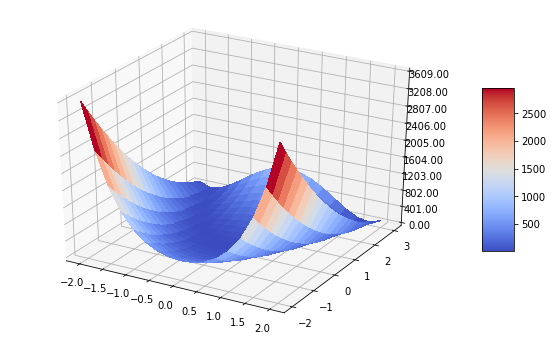

In [69]:
'''
2-D ROSENBROCK FUNCTION
We will use 2-dimensional rosenbrock distribution to explain our different MCMC techniques.
The rosenbrock function is given by: f(x,y) = (a-x)^2 + b* ((y-x^2))^2  where a = 1, b = 100 generally
code is taken from: https://www.cc.gatech.edu/classes/AY2015/cs2316_fall/codesamples/rosenbrock_demo.py
In rosenbrock distribution, for a given value y, 
'''
fig = plt.figure(figsize=(10,6))
ax  = fig.gca(projection='3d')

s = 0.25                        # Try s=1, 0.25, 0.1, or 0.05
X = np.arange(-2, 2.+s, s)   #Could use linspace instead if dividing
Y = np.arange(-2, 3.+s, s)   #evenly instead of stepping...
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)

#Rosenbrock function w/ two parameters using numpy Arrays
Z = (1.-X)**2 + 100.*(Y-X*X)**2

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
         linewidth=0, antialiased=False);  #Try coolwarm vs jet

 
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5);

<h3>Proof: Why Gibbs Sampling works</h3>

<h3>Python code for Sampling</h3>

<h2>Metropolis Algorithm</h2>

<h2>Metropolis - Hastings Algorithm</h2>

<h2>Expectation Maximization (EM)</h2>